In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv(r"C:\Users\HARPAL\Downloads\housing_data.csv")

In [5]:
print("dataset shape:",df.shape)
print(df.head())
print(df.info())

dataset shape: (1460, 81)
   Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   



In [6]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Values": missing,
    "Percentage": missing_percent
})

print(missing_df[missing_df["Missing Values"] > 0])



             Missing Values  Percentage
Alley                  1369   93.767123
MasVnrType              872   59.726027
GarageYrBlt              81    5.547945
Electrical                1    0.068493


In [7]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna("Nonne")

In [8]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
    print("missing values after clening:")
    print(df.isnull().sum().sum())

missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
81
missing values after clening:
0
missing values after clening:
0
missing values after clening:
0
missing values after clening:
0
missing values after clening:
0
missing values after clening:
0
missing values a

<Axes: xlabel='SalePrice', ylabel='Count'>

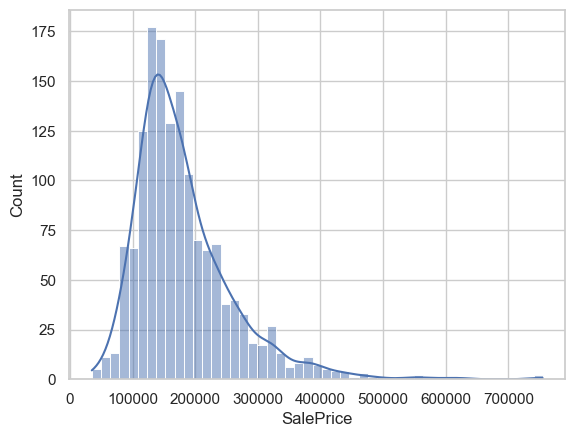

In [9]:
sns.histplot(df["SalePrice"], kde=True)


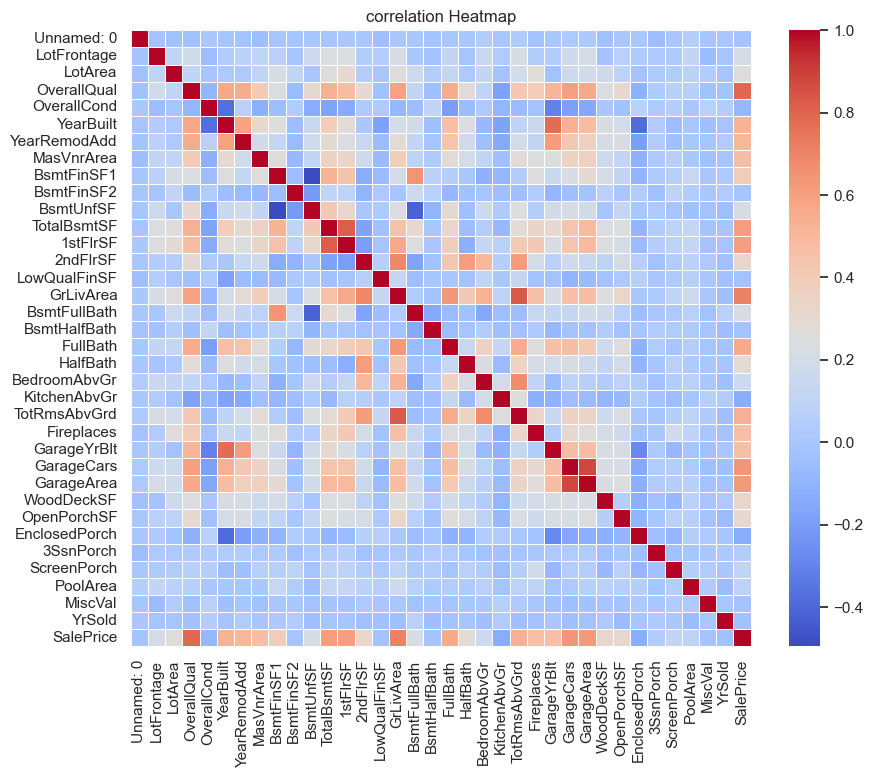

In [8]:
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("correlation Heatmap")
plt.show()

In [20]:
num_cols = df.select_dtypes(include=np.number).columns
corr = df[num_cols].corr()


In [21]:
top_corr = corr["SalePrice"].sort_values(ascending=False)
print("Top Features Correlated with SalePrice:")
print(top_corr.head(10))

Top Features Correlated with SalePrice:
SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
price_per_SqFt    0.575505
FullBath          0.560664
TotRmsAbvGrd      0.533723
Name: SalePrice, dtype: float64


In [10]:
df["price_per_SqFt"] = df["SalePrice"] / df["GrLivArea"]

In [9]:
df["house_age"] = df["YrSold"] - df["YearBuilt"]

In [10]:
df[["SalePrice", "GrLivArea", "price_per_SqFt", "house_age"]].head()

,SalePrice,GrLivArea,price_per_SqFt,house_age
0,208500,1710,121.929825,5
1,181500,1262,143.819334,31
2,223500,1786,125.139978,7
3,140000,1717,81.537566,91
4,250000,2198,113.739763,8


In [11]:
print(df.columns)


Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

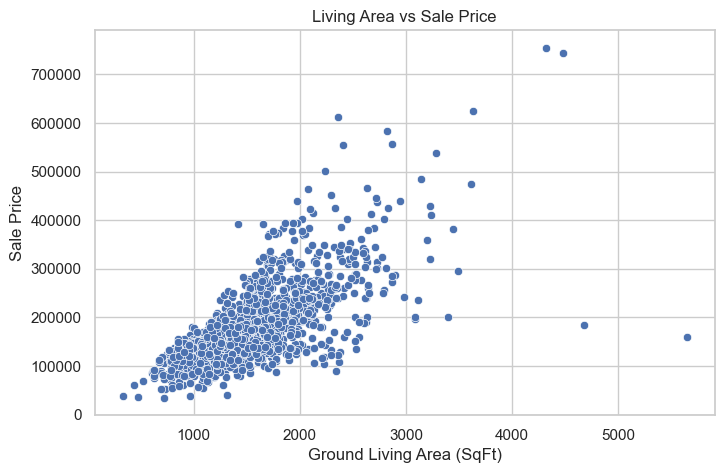

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"])
plt.title("Living Area vs Sale Price")
plt.xlabel("Ground Living Area (SqFt)")
plt.ylabel("Sale Price")
plt.show()

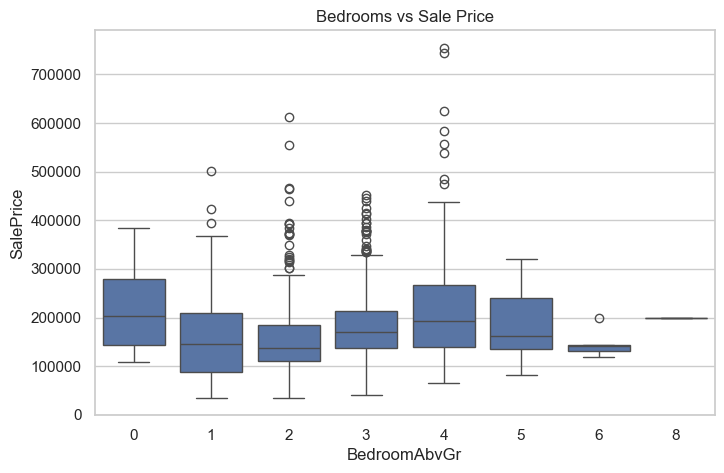

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=df)
plt.title("Bedrooms vs Sale Price")
plt.show()

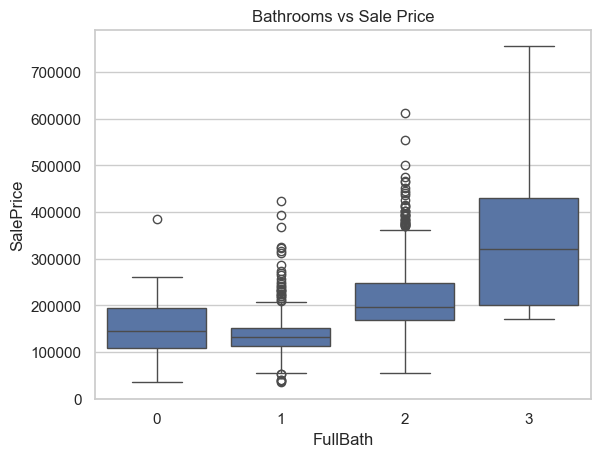

In [16]:
plt.figure()
sns.boxplot(x="FullBath", y="SalePrice", data=df)
plt.title("Bathrooms vs Sale Price")
plt.show()

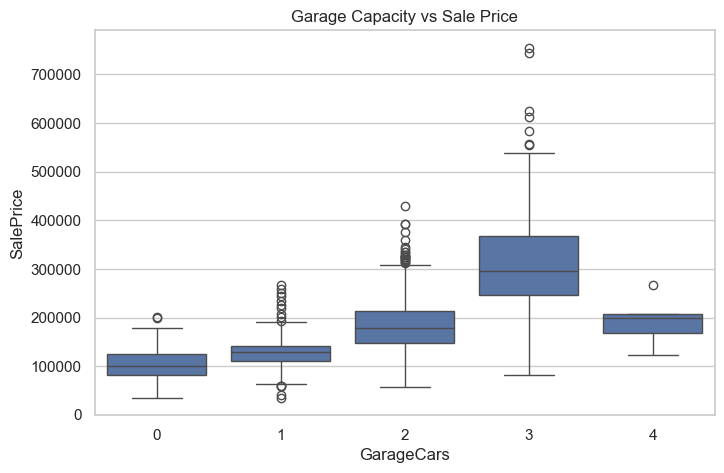

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["GarageCars"], y=df["SalePrice"])
plt.title("Garage Capacity vs Sale Price")
plt.show()

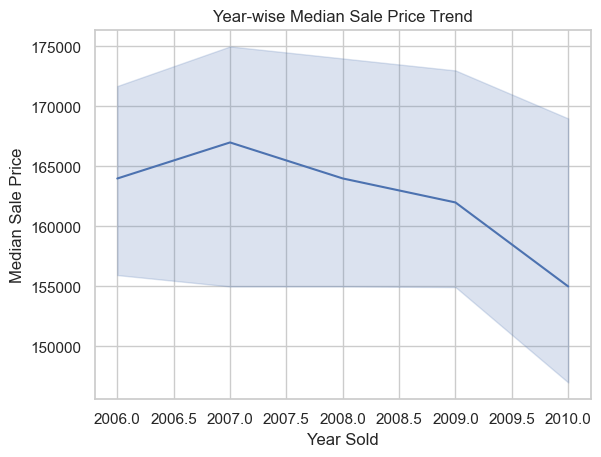

In [17]:
plt.figure()
sns.lineplot(x="YrSold", y="SalePrice", data=df, estimator="median")
plt.title("Year-wise Median Sale Price Trend")
plt.xlabel("Year Sold")
plt.ylabel("Median Sale Price")
plt.show()

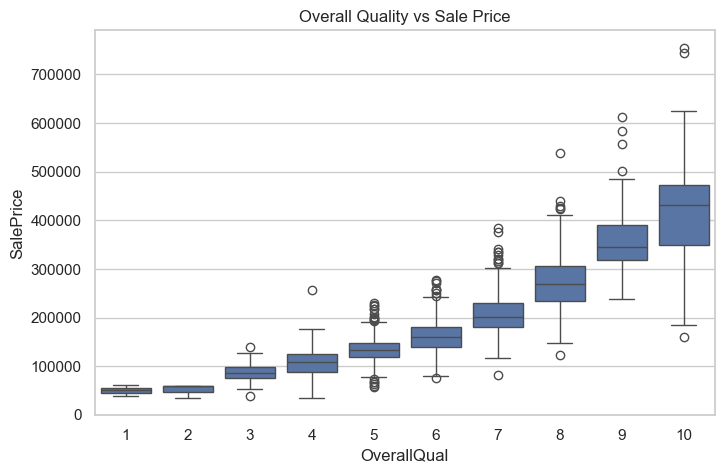

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["OverallQual"], y=df["SalePrice"])
plt.title("Overall Quality vs Sale Price")
plt.show()

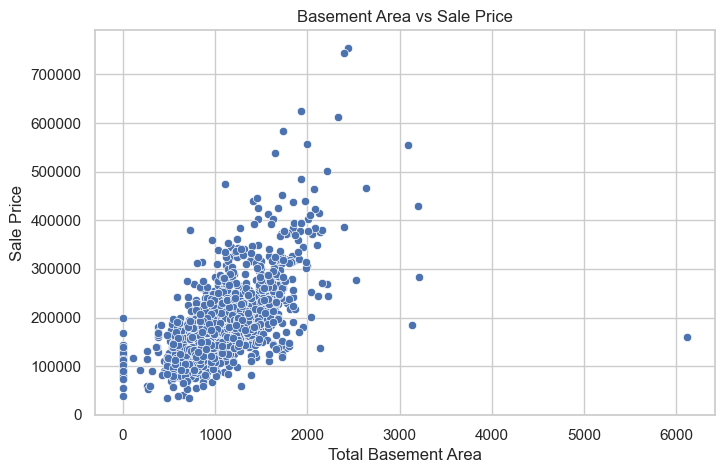

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["TotalBsmtSF"], y=df["SalePrice"])
plt.title("Basement Area vs Sale Price")
plt.xlabel("Total Basement Area")
plt.ylabel("Sale Price")
plt.show()


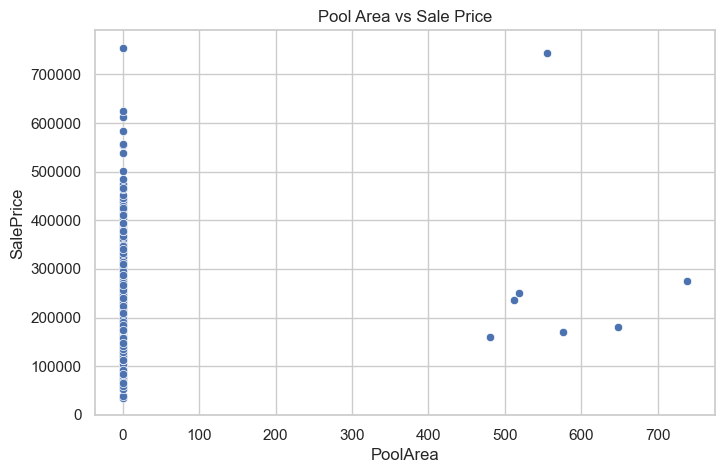

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["PoolArea"], y=df["SalePrice"])
plt.title("Pool Area vs Sale Price")
plt.show()